In [3]:
from google.colab import auth

from google.auth import default
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import gspread
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('gsheet').sheet1


rows = worksheet.get_all_values()


df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})
df.head(20)

,INPUT,OUTPUT
0,1.0,2.0
1,2.0,5.0
2,3.0,8.0
3,4.0,11.0
4,5.0,14.0
5,6.0,17.0
6,7.0,20.0
7,8.0,23.0
8,9.0,26.0
9,10.0,29.0


In [4]:
x=df[['INPUT']].values
y=df[['OUTPUT']].values
x

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)


In [7]:
scalar=MinMaxScaler()
scalar.fit(x_train)

MinMaxScaler()

In [8]:
MinMaxScaler()

MinMaxScaler()

In [9]:
x_train1=scalar.transform(x_train)

In [10]:
ai=Sequential([Dense (units = 2, activation = 'relu', input_shape = [1]), Dense (units = 2, activation = 'relu'),Dense (units = 1)])


In [11]:
ai.compile(optimizer='rmsprop',loss='mse')

In [12]:
ai.fit(x_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 739ms/step - loss: 1095.5385
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 1095.3566
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 1095.2245
Epoch 4/2000
1/1 [==============================] - 0s 16ms/step - loss: 1095.1140
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 1095.0159
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 1094.9260
Epoch 7/2000
1/1 [==============================] - 0s 17ms/step - loss: 1094.8420
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 1094.7626
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 1094.6863
Epoch 10/2000
1/1 [==============================] - 0s 11ms/step - loss: 1094.6128
Epoch 11/2000
1/1 [==============================] - 0s 11ms/step - loss: 1094.5416
Epoch 12/2000
1/1 [==============================] - 0s 12ms/step - loss: 1094.4722


In [13]:
loss_df = pd.DataFrame(ai.history.history)

<Axes: >

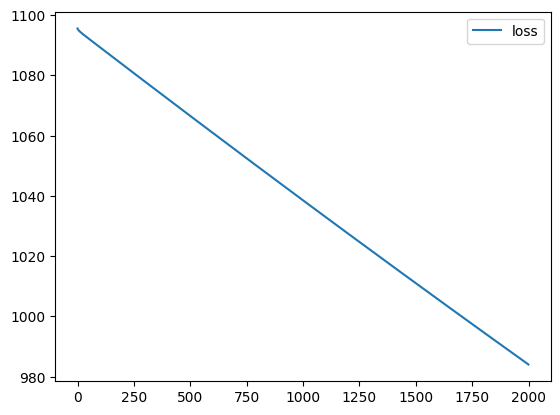

In [14]:
loss_df.plot()

In [15]:
X_test1 = scalar.transform(x_test)

In [16]:
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 147ms/step - loss: 1346.8881


1346.8880615234375

In [17]:
X_n1 = [[10]]

In [18]:
X_n1_1 = scalar.transform(X_n1)

In [19]:
ai.predict(X_n1_1)

1/1 [==============================] - 0s 94ms/step


array([[2.008522]], dtype=float32)